## 🔬 Visualize Synthetic Lasso Regression Results
This notebook loads generated synthetic data and fits the LassoHomotopy model.

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

from LassoHomotopy.model.LassoHomotopy import LassoHomotopyModel

%matplotlib inline

### 📥 Load generated_test.csv data

In [2]:
data = []
csv_path = os.path.join("LassoHomotopy", "tests", "generated_test.csv")

with open(csv_path, "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append({k: float(v) for k, v in row.items()})

X = np.array([[row[k] for k in row if k.startswith("x")] for row in data])
y = np.array([row["y"] for row in data])

### 🧠 Train the Lasso model

In [3]:
model = LassoHomotopyModel()
results = model.fit(X, y, tol=0.1)
preds = results.predict(X)
coef = results.coef_

Initial λ: 17405.684300628604, Active feature: 4
Iteration 1, Beta: [0.         0.         0.         0.         4.83139783]
Max correlation: 10513.17074312195 at feature 1
Iteration 2, Beta: [ 0.         -3.06186697  0.          0.          4.85078814]
Max correlation: 6200.745192374173 at feature 0
Iteration 3, Beta: [ 2.02033301 -3.00687986  0.          0.          5.00683664]
Max correlation: 105.36336193510157 at feature 3
Iteration 4, Beta: [ 2.01905837 -3.00749255  0.         -0.03266416  5.00226015]
Max correlation: 8.606722903053607 at feature 2
Iteration 5, Beta: [ 2.01911887e+00 -3.00744260e+00 -2.98048689e-03 -3.27796386e-02
  5.00273186e+00]
Max correlation: 0.0 at feature 0
Converged.


### 📊 Plot Predicted vs True Values

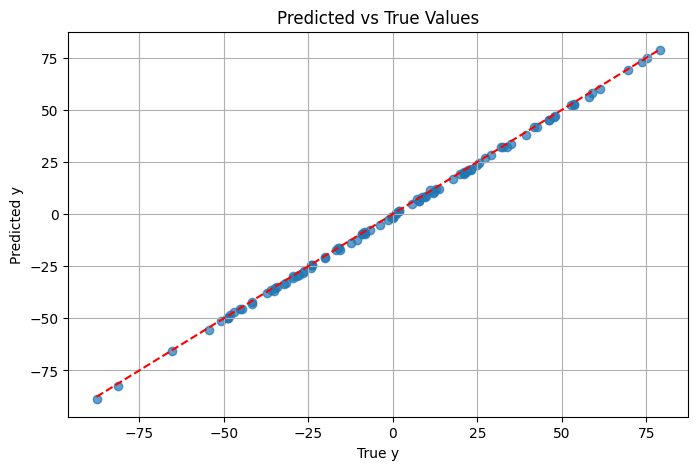

In [4]:
plt.figure(figsize=(8, 5))
plt.scatter(y, preds, alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title("Predicted vs True Values")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.grid(True)
plt.show()

### 📉 Plot Residuals

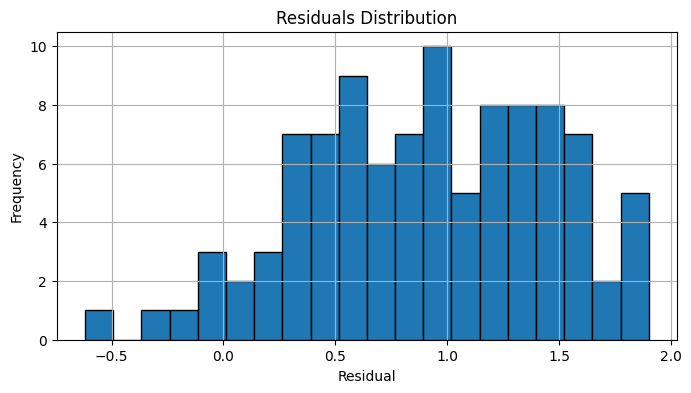

In [5]:
residuals = y - preds

plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### 🧮 Visualize Coefficients

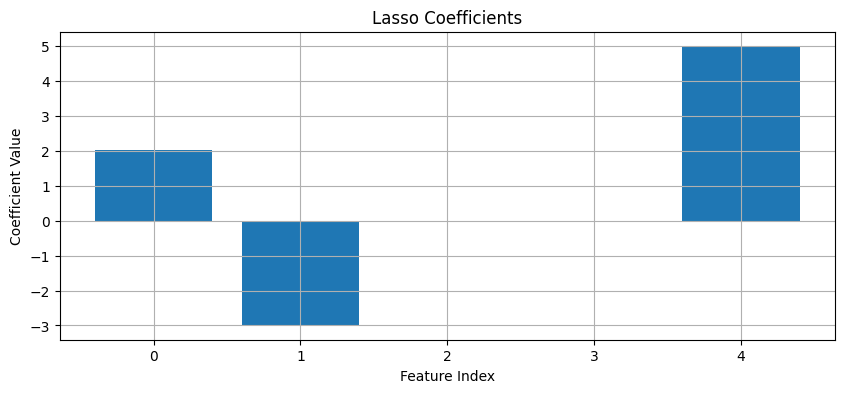

In [6]:
plt.figure(figsize=(10, 4))
plt.bar(range(len(coef)), coef)
plt.title("Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

### 📈 Print Evaluation Metrics

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, preds)
r2 = r2_score(y, preds)
num_zero = np.sum(np.abs(coef) < 1e-2)

print(f"📏 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")
print(f"🧹 Near-zero coefficients: {num_zero} / {len(coef)}")

📏 MSE: 1.1245
📈 R²: 0.9991
🧹 Near-zero coefficients: 1 / 5
